In [8]:
from pipeline import Solar_pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
trial_name = 'Standard/'
dataset = pd.read_csv('./data/Table_dataset.csv')
hyperparams_path = './hyperparams.json'
model_path = './model/' + trial_name
pred_path = './prediction/' + trial_name
target_name = 'Thickness'
test_size = 0.3
random_state = 42

SP = Solar_pipeline(dataset, target_name, hyperparams_path, model_path, pred_path,
                    test_size=test_size, random_state=random_state)

In [10]:
SP.fit()

Model found. Loading the model >> LinearRegression
Time consumed loading/training model :: 0.00 s
No hyperparameters to tune >> LinearRegression
**************************************************


Model found. Loading the model >> Ridge
Time consumed loading/training model :: 0.06 s
BEST PARAMS >> Ridge: OrderedDict([('alpha', 10.0), ('solver', 'saga')])
**************************************************


Model found. Loading the model >> Lasso
Time consumed loading/training model :: 0.05 s
BEST PARAMS >> Lasso: OrderedDict([('alpha', 0.294291468580296), ('selection', 'random')])
**************************************************


Model found. Loading the model >> ElasticNet
Time consumed loading/training model :: 0.03 s
BEST PARAMS >> ElasticNet: OrderedDict([('alpha', 10.0), ('l1_ratio', 0.0), ('selection', 'random')])
**************************************************


Model found. Loading the model >> BayesianRidge
Time consumed loading/training model :: 0.02 s
BEST PARAMS >> B

In [11]:
SP.display_perf_table(metric='R2', ascending=False)

,R2,RMSE,MSE,MAE,MAPE
AdaBoostRegressor,0.94108,5.95415,35.45184,4.92027,5.34890
GradientBoostingRegressor,0.93895,6.06069,36.73202,4.42137,4.76266
MLPRegressor,0.93674,6.16983,38.06682,5.13070,5.96087
KNeighborsRegressor,0.90680,7.48855,56.07845,4.83105,4.75203
CatBoostRegressor,0.90365,7.61408,57.97422,5.19090,5.45043
XGBRegressor,0.86717,8.94006,79.92463,5.95940,6.23113
LGBMRegressor,0.85901,9.21067,84.83652,6.18424,6.31861
RandomForestRegressor,0.84746,9.58037,91.78344,6.06558,6.12863
DecisionTreeRegressor,0.82540,10.24988,105.06005,6.62531,7.03359
SVR,0.63750,14.76882,218.11791,7.57357,7.23006


In [12]:
SP.display_perf_table(metric = 'RMSE')

,R2,RMSE,MSE,MAE,MAPE
AdaBoostRegressor,0.94108,5.95415,35.45184,4.92027,5.34890
GradientBoostingRegressor,0.93895,6.06069,36.73202,4.42137,4.76266
MLPRegressor,0.93674,6.16983,38.06682,5.13070,5.96087
KNeighborsRegressor,0.90680,7.48855,56.07845,4.83105,4.75203
CatBoostRegressor,0.90365,7.61408,57.97422,5.19090,5.45043
XGBRegressor,0.86717,8.94006,79.92463,5.95940,6.23113
LGBMRegressor,0.85901,9.21067,84.83652,6.18424,6.31861
RandomForestRegressor,0.84746,9.58037,91.78344,6.06558,6.12863
DecisionTreeRegressor,0.82540,10.24988,105.06005,6.62531,7.03359
SVR,0.63750,14.76882,218.11791,7.57357,7.23006


Best Model: AdaBoostRegressor
Best hyperparams: OrderedDict([('learning_rate', 0.8375509671977311), ('n_estimators', 447)])
Best performance: R2       0.941082
RMSE     5.954145
MSE     35.451844
MAE      4.920274
MAPE     5.348904
Name: AdaBoostRegressor, dtype: float64


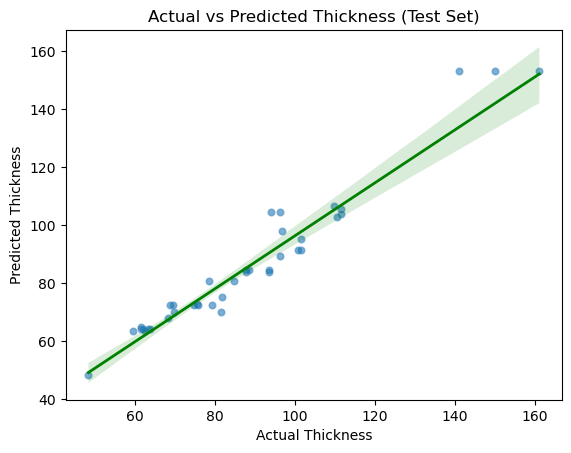

In [13]:
best_model, y_pred, test_pred = SP.summarize(metric='RMSE')

In [31]:
y_test = SP.y_test.values
pd.DataFrame([y_test, y_pred], index = ['y_test', 'y_pred']).T.to_excel('y_test_y_pred.xlsx')

In [14]:
print(best_model)

BayesSearchCV(cv=10, estimator=AdaBoostRegressor(), n_jobs=-1, random_state=42,
              scoring='neg_mean_squared_error',
              search_spaces={'learning_rate': [0.001, 1.0],
                             'n_estimators': [50, 500]})


<Axes: >

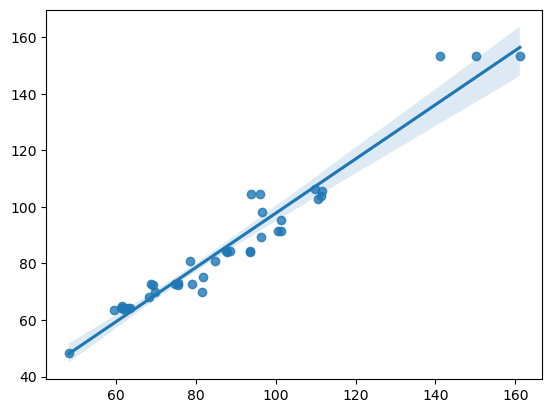

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x = y_test, y = y_pred, fit_reg=True, ci = 95)

RI 추가로 오차 감소 가능한지 확인